<h1 align="center"> OUASS TAOUFIK </h1>

<h2 align="center"> Credit Card Fraud Detection </h2>


Dans ce projet, nous avons évalué une variété de modèles sur une base de données des transactions carte crédit.
En raison du déséquilibre des données, il est difficile pour les modèles d'apprentissage automatique de détecter avec précision la classe minoritaire (dans notre cas, les transactions frauduleuses), car les modèles ont tendance à prédire la classe majoritaire, ainsi pour résoudre ce problème, nous employons des techniques de sous-échantillonnage et de sur-échantillonnage (SMOTE).

En conclusion, nous avons constaté que le modèle de regression logistique était le plus performant, Le modèle a obtenu une précision et un rappel (recall) plus élevés par rapport aux autres modèles (KNN, Decision Tree) que nous avons évalués.


In [1]:
# Importation des librairies
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.metrics import classification_report_imbalanced
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# ML algorithmes
import collections
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('database.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
#Pas de valeurs nulles

df.isnull().sum().max()

0

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# Les classes sont fortement déséquilibrées, nous devrons résoudre ce problème plus tard.

print('Pas de fraude :', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% de la base de données')
print('Fraudes :', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% de la base de données')

Pas de fraude : 99.83 % de la base de données
Fraudes : 0.17 % de la base de données


Text(0.5, 1.0, 'Distributions de Class \n (0: Pas de fraude|| 1: Fraudes)')

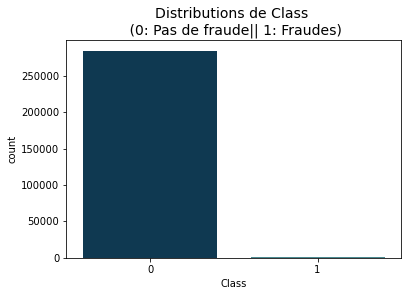

In [6]:
colors = ["#043c5c", "#3e949c"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Distributions de Class \n (0: Pas de fraude|| 1: Fraudes)', fontsize=14)

**Distributions:** En observant les distributions de "Time" et "Amount", nous pouvons avoir une idée de l'asymétrie de ces caractéristiques,

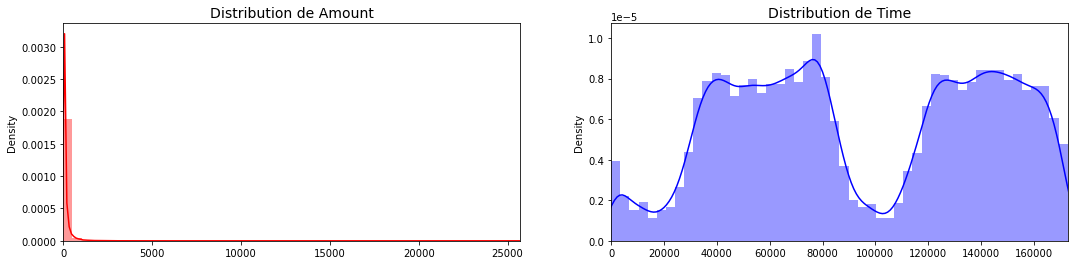

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

value_amount = df['Amount'].values
value_time = df['Time'].values

sns.distplot(value_amount, ax=ax[0], color='r')
ax[0].set_title('Distribution de Amount', fontsize=14)
ax[0].set_xlim([min(value_amount), max(value_amount)])

sns.distplot(value_time, ax=ax[1], color='b')
ax[1].set_title('Distribution de Time', fontsize=14)
ax[1].set_xlim([min(value_time), max(value_time)])



plt.show()

<h2>Feature Scaling </h2>
<a id="distributing"></a>
Nous allons d'abord corriger les colonnes "Time" et "Amount" par un "feature scaling". D'autre part, nous devons également créer un sous-échantillon de la base de données afin d'avoir un nombre égal de cas frauduleux et non frauduleux pour éviter les surajustements (overfitting) et les corrélations erronées, ce qui aidera nos algorithmes à mieux comprendre les modèles qui déterminent si une transaction est frauduleuse ou non.

Dans ce contexte, notre sous-échantillon sera un ensemble de données avec un ratio 50/50 de transactions frauduleuses et non frauduleuses. Cela signifie que notre sous-échantillon aura le même nombre de transactions frauduleuses et non frauduleuses.


In [8]:
from sklearn.preprocessing import  RobustScaler

rob_scaler = RobustScaler()

df['corr_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['corr_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
corr_amount = df['corr_amount']
corr_time = df['corr_time']

df.drop(['corr_amount', 'corr_time'], axis=1, inplace=True)
df.insert(0, 'corr_amount', corr_amount)
df.insert(1, 'corr_time', corr_time)


df.head()

,corr_amount,corr_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Train/Test data Splitting
<a id="splitting"></a>
Avant de procéder à la technique de sous-échantillonnage aléatoire, nous devons diviser la base de données originale en "training" et "testing" dataset. N'oubliez pas que, même si nous divisons les données lorsque nous mettons en œuvre les techniques de sous-échantillonnage ou de sur-échantillonnage aléatoire, nous voulons tester nos modèles sur la base de données de test originales et non sur la base de données de test créées par l'une de ces techniques. L'objectif principal est d'ajuster le modèle avec les données qui ont été sous-échantillonnées et suréchantillonnées (afin que nos modèles puissent détecter les fraudes), et de les tester sur la base de donnees de test original. 


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import train_test_split

print('Pas de fraude :', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% de la base de données')
print('Fraudes :', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% de la base de données')

X = df.drop('Class', axis=1)
y = df['Class']

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

#  Nous avons déjà X_train et y_train pour les données de sous-échantillon, c'est pourquoi j'utilise "original" pour distinguer et ne pas écraser ces variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)


# Transformer en array
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values
original_Xtest = original_Xtest.values
original_Xtrain = original_Xtrain.values


Pas de fraude : 99.83 % de la base de données
Fraudes : 0.17 % de la base de données
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


## Sous-échantillonnage aléatoire:

Dans cette phase du projet, nous mettrons en œuvre un "sous-échantillonnage aléatoire" qui consiste essentiellement à supprimer des données afin d'obtenir un ensemble de données plus équilibré et d'éviter ainsi que nos modèles soient surajustés (overfitted).



**Remarque:** Le souci principal du "sous-échantillonnage aléatoire" est que nous risquons que nos modèles de classification ne soient pas aussi précis que nous le souhaiterions, en raison de la grande quantité d'informations perdues (492 transactions non frauduleuses parmi 284 315 transactions non frauduleuses).

In [11]:
# Mélangeons les données avant de créer les sous-échantillons.

sample_df = df.sample(frac=1)

fraud = sample_df.loc[sample_df['Class'] == 1]
nonfraud = sample_df.loc[sample_df['Class'] == 0][:492]

normal_df = pd.concat([fraud, nonfraud])

# Mélanger les lignes de dataframe
new_df = normal_df.sample(frac=1, random_state=42)

new_df.head()

,corr_amount,corr_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
180728,0.049326,0.469742,0.096792,0.622048,-0.821039,-2.188133,0.172677,-1.150375,0.664279,0.056476,...,-0.123212,-0.130955,-0.297883,0.103480,-0.631922,-0.559046,-0.495321,-0.015940,0.010181,0
79874,-0.236289,-0.311035,-0.443794,1.271395,1.206178,0.790371,0.418935,-0.848376,0.917691,-0.235511,...,-0.067205,0.119279,0.513479,-0.264243,0.443311,0.029516,-0.335141,-0.188815,-0.123391,1
52140,-0.293579,-0.462870,-2.763479,-1.168318,1.256130,0.416324,1.763507,-1.446950,-0.744067,0.034506,...,-0.716363,-0.282980,-0.313846,-0.234741,0.264017,-0.786394,-0.025341,-0.167690,0.882471,0
191690,-0.307413,0.524900,1.183931,3.057250,-6.161997,5.543972,1.617041,-1.848006,-1.005508,0.339937,...,0.252571,0.109185,-0.931072,-0.064175,-0.007013,0.345419,0.064558,0.476629,0.323740,1
229730,-0.276392,0.720568,1.894036,1.905806,-3.515730,4.508913,2.044466,-1.420468,1.057480,-0.281157,...,-0.160163,-0.144713,-0.310108,-0.101530,-0.414960,0.376597,0.150778,-0.013712,0.048084,1


##  Distribution et Correlation: 
<a id="correlating"></a>
Maintenant que notre dataframe est correctement équilibré, nous pouvons aller plus loin dans l'analyse et le pré-traitement des données.

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


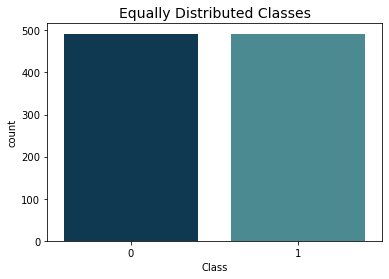

In [12]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

<h3> Correlation Matrices </h3>


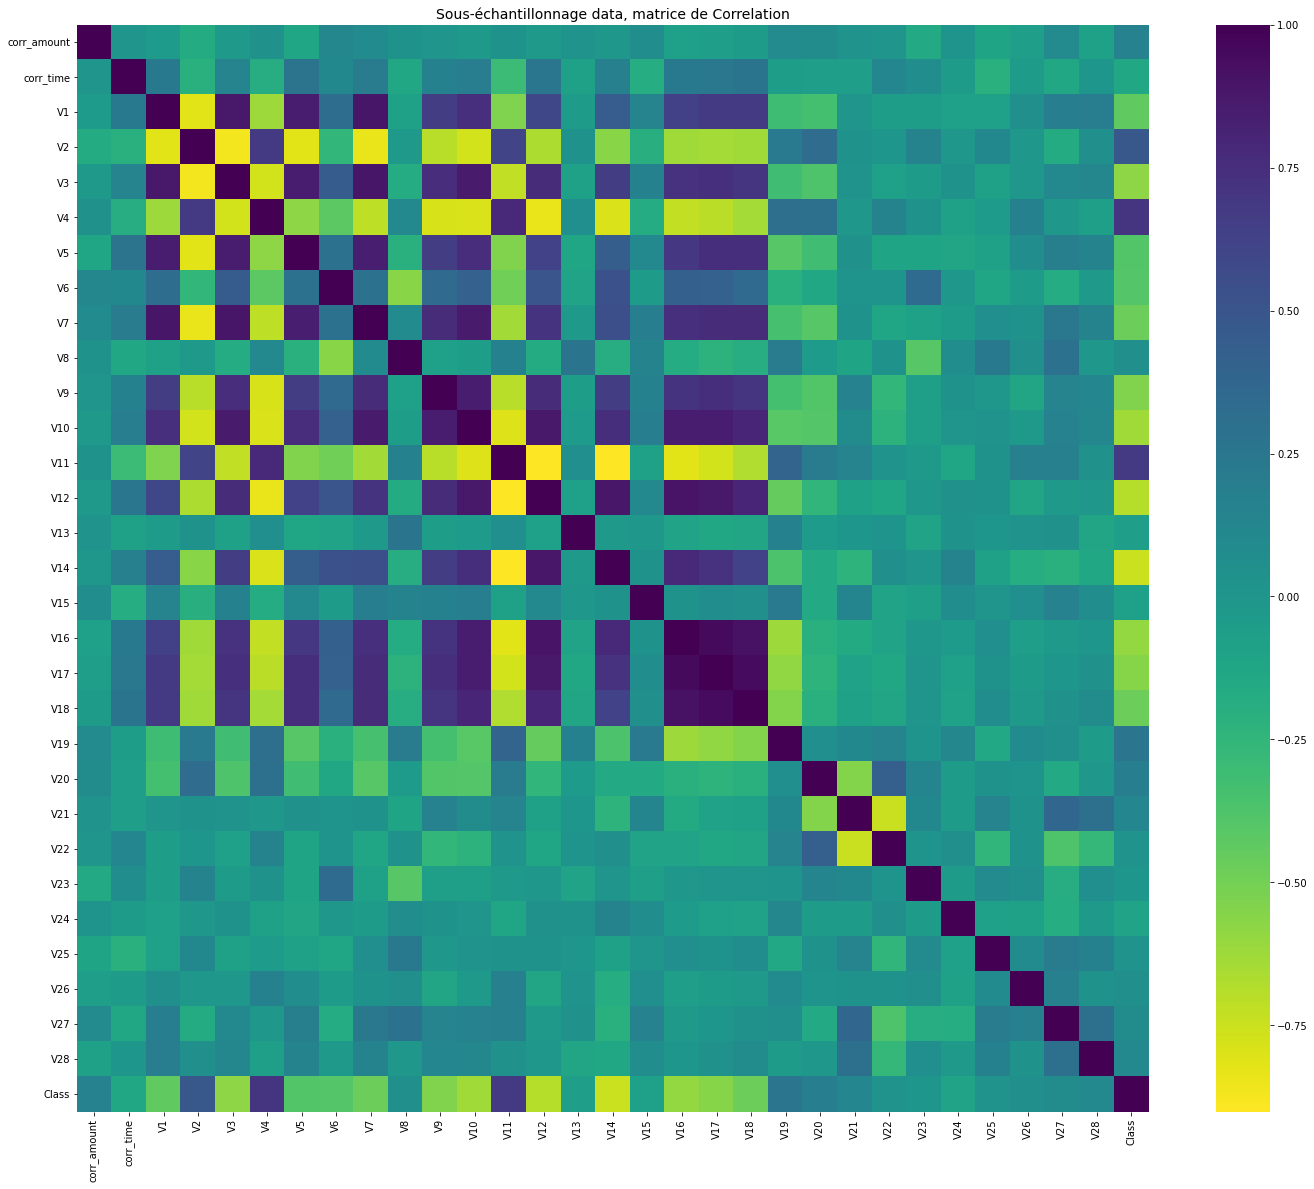

In [13]:
f, ( ax2) = plt.subplots( 1, figsize=(10,10))

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='viridis_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Sous-échantillonnage data, matrice de Correlation', fontsize=14)
plt.show()

<h2>Dimensionality Reduction and Clustering: </h2>


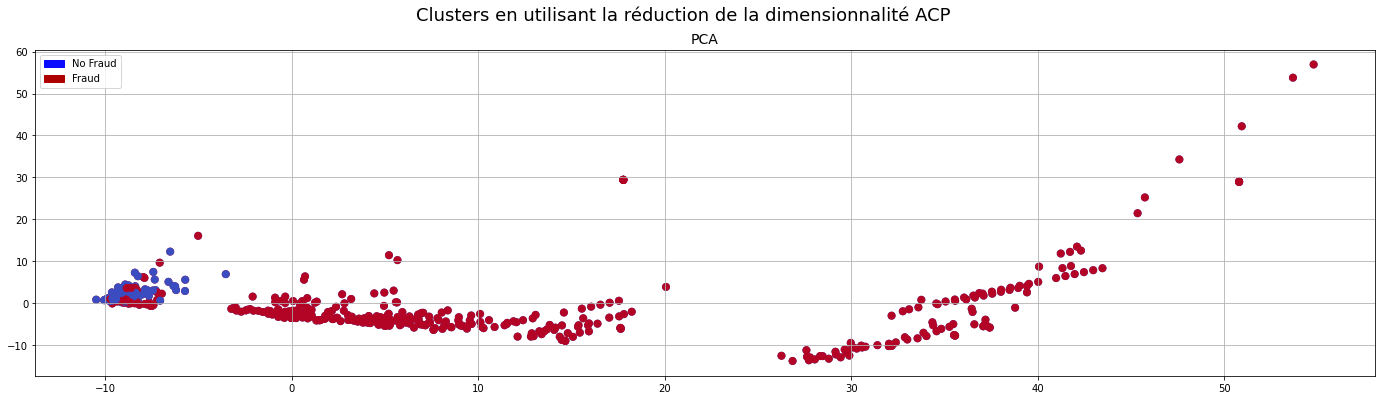

In [14]:
# New_df provient des données du sous-échantillon aléatoire
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# PCA Implementation
X_acp = PCA(n_components=2, random_state=42).fit_transform(X.values)
f, ( ax2) = plt.subplots(1 , figsize=(24,6))
f.suptitle('Clusters en utilisant la réduction de la dimensionnalité ACP', fontsize=18)

blue= mpatches.Patch(color='#0A0AFF', label='No Fraud')
red = mpatches.Patch(color='#AF0000', label='Fraud')

# ACP scatter plot
ax2.scatter(X_acp[:,0], X_acp[:,1], c=(y == 0), cmap='coolwarm', label='Pas de fraude', linewidths=2)
ax2.scatter(X_acp[:,0], X_acp[:,1], c=(y == 1), cmap='coolwarm', label='Fraudes', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue, red])

plt.show()

<h2> Classification (UnderSampling): Logisitic Regression, DecisionTree, KNN.  </h2>
<a id="classifiers"></a>

Dans cette section, nous allons entraîner quatre types de classificateurs et décider lequel sera le plus efficace pour détecter les transactions frauduleuses.

## Synthèse: 
<ul>
<li> <b> Logistic Regression </b> est plus précis que les trois autres algorithmes dans la plupart des cas. (Nous analyserons plus en détail la régression logistique) </li>
<li><b> GridSearchCV </b>est utilisé pour déterminer les paramètres qui donnent le meilleur score prédictif pour les classificateurs. </li>
<li>  La régression logistique présente le meilleur score ROC (Receiving Operating Characteristic), ce qui signifie que la régression logistique sépare assez précisément les transactions frauduleuses des non- frauduleuses..</li>
</ul>


In [15]:
# Sous-échantillonnage avant la validation croisée (risque d'overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

classifiers = {
    "logre": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "CART": DecisionTreeClassifier()
}

In [17]:

from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("L'algorithme: ", classifier.__class__.__name__, "A un score d'entrainement", round(training_score.mean(), 2) * 100, "% accuracy score")

L'algorithme:  LogisticRegression A un score d'entrainement 94.0 % accuracy score
L'algorithme:  KNeighborsClassifier A un score d'entrainement 95.0 % accuracy score
L'algorithme:  DecisionTreeClassifier A un score d'entrainement 90.0 % accuracy score


In [18]:
# Utilisez GridSearchCV pour trouver les meilleurs paramètres.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
logreg_param = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), logreg_param)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_


# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)


# tree best estimator
tree_clf = grid_tree.best_estimator_

In [19]:
# Cross Validation

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.79%
Knears Neighbors Cross Validation Score 94.66%
DecisionTree Classifier Cross Validation Score 91.99%


In [56]:
# Nous ferons un sous-échantillonnage pendant Cross Validation
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in skf.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 


Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [27]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Créez un tableau avec tous les scores et les noms des classificateurs.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.982787150151897
KNears Neighbors:  0.9453978411220993
Decision Tree Classifier:  0.9188029215952428


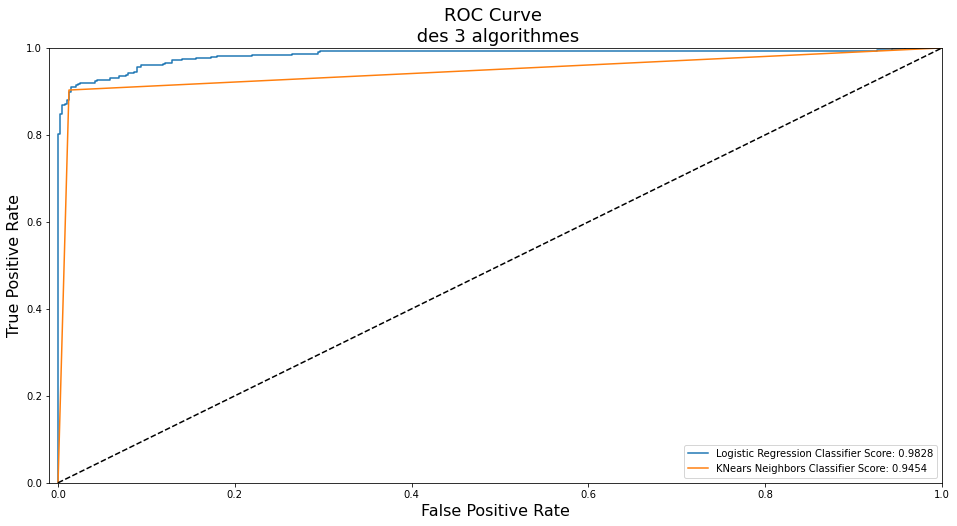

In [45]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n des 3 algorithmes', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr)
plt.show()

## Un aperçu plus approfondi de la régression logistique :
<a id="logistic"></a>
Dans cette section, nous allons examiner de plus près le classificateur de régression logistique.


### La précision commence à diminuer entre 0,90 et 0,92 ; néanmoins, notre score de précision est encore assez élevé et nous avons toujours un bon score de rappel (recall score).


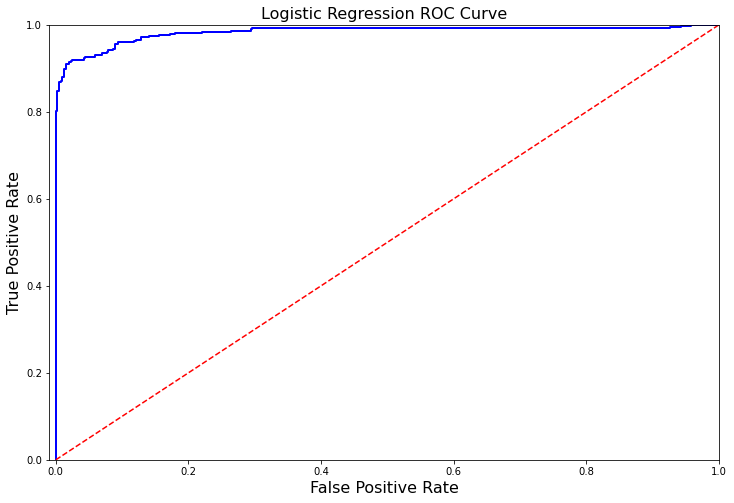

In [29]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.93
Precision Score: 0.98
F1 Score: 0.95
Accuracy Score: 0.95
---------------------------------------------------------------------------------------------------------------------------------------


In [31]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [32]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.30


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.30')

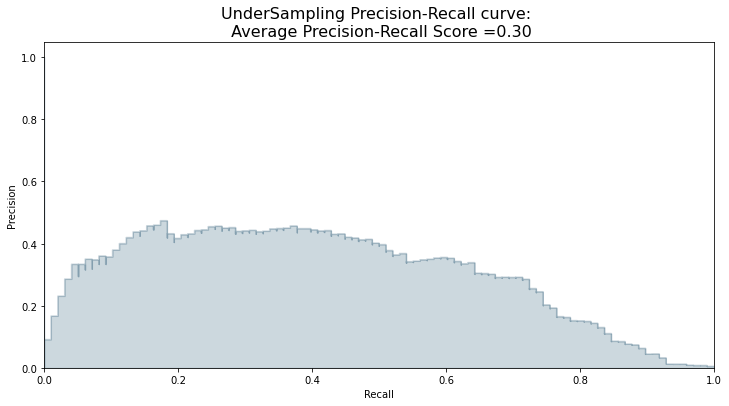

In [54]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#043c5c', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#043c5c')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

### SMOTE Technique (Sur-échantillonnage):

<b>SMOTE</b> stands for Synthetic Minority Over-sampling Technique.  Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems". <br><br>


<b> Understanding SMOTE: </b>
<ul>
<li> <b> Solving the Class Imbalance: </b> SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class. </li>
<li><b>Location of the synthetic points: </b>   SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points. </li>
<li> <b>Final Effect:  </b> More information is retained since we didn't have to delete any rows unlike in random undersampling.</li>
<li><b> Accuracy || Time Tradeoff: </b> Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.</li>

</ul>


In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# Liste pour ajouter le score et ensuite trouver la moyenne
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classification avec des paramètres optimaux

log_reg_sm = LogisticRegression()
rand_log_reg = RandomizedSearchCV(LogisticRegression(), logreg_param, n_iter=4)

# Implemention de SMOTE 
# Parameters
logreg_param = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in skf.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9430981713566415
precision: 0.059949501575077536
recall: 0.9137293086660175
f1: 0.11081756036761874
---------------------------------------------------------------------------------------------------------------------------------------


In [35]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.10      0.86      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.58     56961
weighted avg       1.00      0.99      0.99     56961



In [36]:
y_score = best_est.decision_function(original_Xtest)

In [37]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.70


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.70')

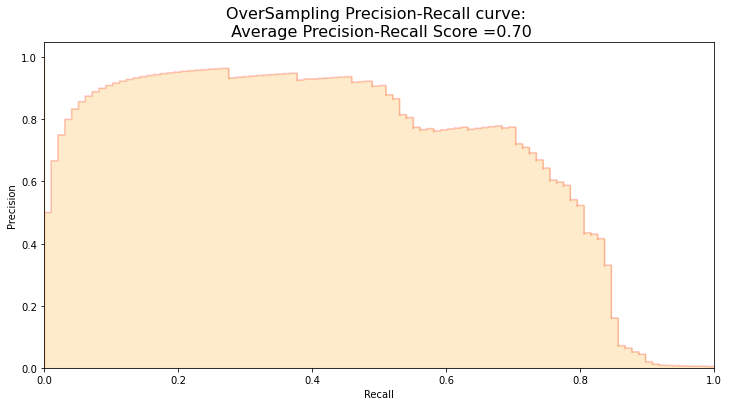

In [38]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [39]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [40]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :6.97467041015625 sec


# Test Data with Logistic Regression:
<a id="testing_logistic"></a>
## Confusion Matrix:


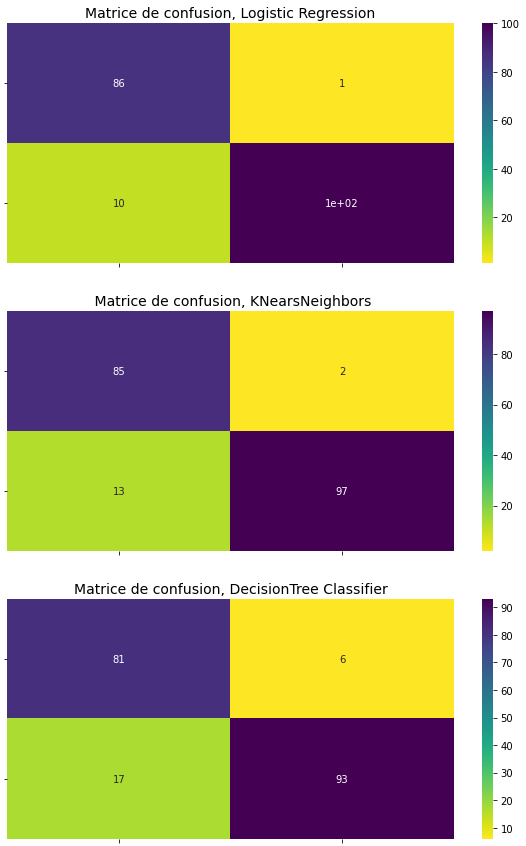

In [55]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(3,figsize=(10,15))

sns.heatmap(log_reg_cf, ax=ax[0], annot=True, cmap='viridis_r')
ax[0].set_title("Matrice de confusion, Logistic Regression", fontsize=14)
ax[0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[1], annot=True, cmap='viridis_r')
ax[1].set_title(" Matrice de confusion, KNearsNeighbors", fontsize=14)
ax[1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[2], annot=True, cmap='viridis_r')
ax[2].set_title("Matrice de confusion, DecisionTree Classifier", fontsize=14)
ax[2].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

In [42]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('DecisionTree Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        87
           1       0.99      0.91      0.95       110

    accuracy                           0.94       197
   macro avg       0.94      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        87
           1       0.98      0.88      0.93       110

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197

DecisionTree Classifier:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        87
           1       0.94      0.85      0.89       110

    accuracy                           0.88       197
   macro avg       0.88      0.89      0.88       197
weighted a

In [43]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.944162
1,Oversampling (SMOTE),0.986026
